# **Project 1**

**Porto Seguro’s Safe Driver Prediction**


---

Anna Karen Casillas Garcia

**Data Description**

---



 We will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. 

Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

**File descriptions**

---


* **train.csv** contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
* **test.csv** contains the test data.
* **sample_submission.csv** is submission file showing the correct format.

In [1]:
!curl -L -O https://raw.githubusercontent.com/AnnaKarenCasillas/Project1/master/feature_selector.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8501  100  8501    0     0  54146      0 --:--:-- --:--:-- --:--:-- 54146


In [2]:
!unzip feature_selector.zip

Archive:  feature_selector.zip
   creating: feature_selector/
  inflating: __MACOSX/._feature_selector  
  inflating: feature_selector/feature_selector.py  
  inflating: __MACOSX/feature_selector/._feature_selector.py  
  inflating: feature_selector/__init__.py  
  inflating: __MACOSX/feature_selector/.___init__.py  


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np    
import pandas as pd   
import matplotlib.pyplot as plt  
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import f1_score,roc_auc_score,make_scorer,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from feature_selector import FeatureSelector
from sklearn.preprocessing import StandardScaler
from collections import Counter
from numpy import where


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
!curl -L -O https://raw.githubusercontent.com/AnnaKarenCasillas/Project1/master/porto-seguro-safe-driver-prediction.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76.5M  100 76.5M    0     0  15.7M      0  0:00:04  0:00:04 --:--:-- 19.7M


In [5]:
!unzip porto-seguro-safe-driver-prediction.zip

Archive:  porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
#loading datasets
path_data = "/content/test.csv"
df_test = pd.read_csv(path_data)
df_test_na = pd.read_csv(path_data,na_values='-1')
path_data = "/content/train.csv"
df_train = pd.read_csv(path_data)
df_train_na = pd.read_csv(path_data,na_values='-1')

In [7]:
print("test shape:",df_test.shape)
print("train shape:",df_train.shape)

test shape: (892816, 58)
train shape: (595212, 59)


# Training Dataset

##Description of Train Dataset

In [8]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Check if the dataset is balanced

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


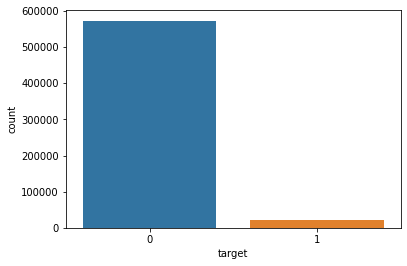

In [11]:
sns.countplot(df_train['target'])

In [12]:
df_train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [13]:
df_train.shape

(595212, 59)

## Pre-processing

We are going to analyze the data to transform it, and get the best shape of it to continue after with the training model.

### Correlation Matrix


---

We will get the correlation with Method Pearson

In [14]:
corr_df_train = df_train.drop(columns=['id'], axis=1).corr(method='pearson')
corr_df_train

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031534,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000270,8.255181e-04,0.001028,0.002626,-0.000151,-0.002776,0.000487,1.272742e-04,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,-0.000636,-0.001831,0.001313,-0.001013,0.012326,0.004315,0.007163,-0.008252,-0.017836,-0.009124,-0.019510,-0.036213,0.012879,-0.011399,-0.010873,-0.006562,-0.007230,0.053777,-0.002084,-0.008334,0.002168,-0.002250,0.001076,-0.016302,-0.015259,-0.001427,-0.006629,-0.001739,0.002379,-0.001560,1.291697e-03,-0.000642,-0.000249,-0.001902,-0.00

In [15]:
upper = corr_df_train.where(np.triu(np.ones(corr_df_train.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any (upper[col].abs() > 0.9)]
print(f'collinear columns count: {len(to_drop)}')

collinear columns count: 0


### Heat Map


---

Using Heat Map, we get a better idea of which variables have more correlationship.


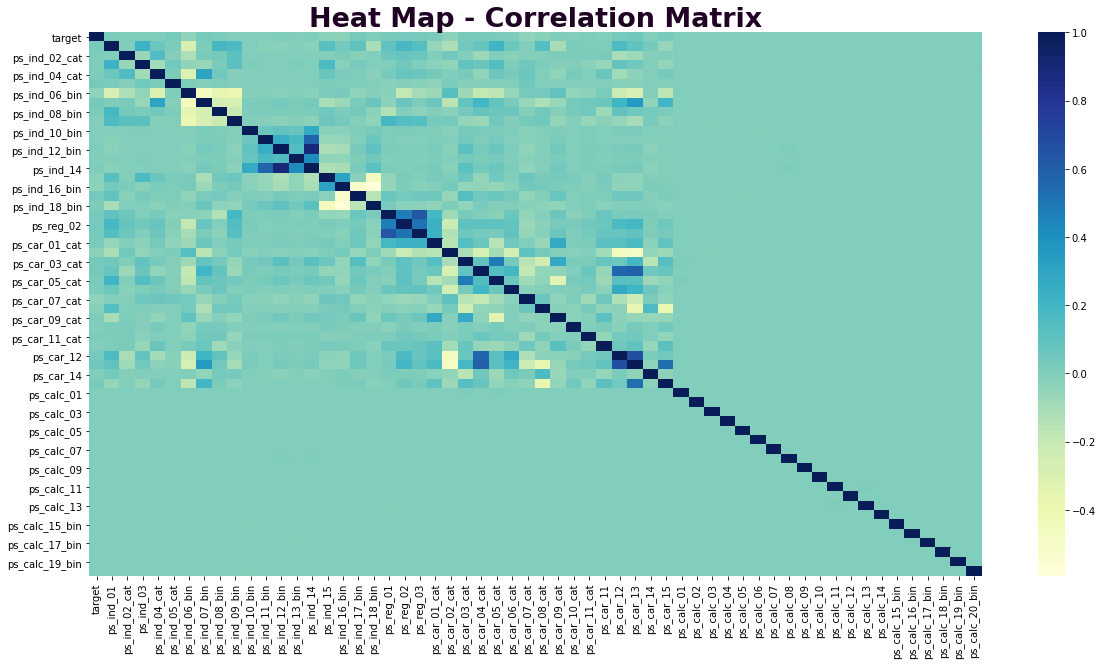

In [16]:
fig, ax = plt.subplots(figsize=(20,10))   
sns.heatmap(corr_df_train, annot = False,cmap='YlGnBu',annot_kws={'size':30},ax = ax)
ax.set_title("Heat Map - Correlation Matrix",fontdict={'fontsize': 27,'fontweight' : 'bold', 'color' : '#200224'})
plt.show()

### Cleaning and Fill



In [17]:
#We check If data is duplicated
df_train.drop_duplicates()
df_train.shape # There is no duplicated data.

(595212, 59)

In [18]:
df_train_tr = df_train.copy()

Discard features with little or no correlation either with the target or other features. Looking at the above correlation matrix, features with label _calc_ have no enough correlation with target, let's drop them.

In [19]:
#fucntion to remove features that contains 'calc' in the column name/label
def remove_calc_features(data_df):
  for label, content in data_df.items():
    if '_calc' in label:
      data_df.drop([label], axis=1, inplace=True)

  return data_df


In [20]:
df_train_tr = remove_calc_features(df_train_tr) # remove calc's features
df_train_tr.columns.values # The strongest features

array(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15'], dtype=object)

In [21]:
#Verify that there is only one feature per column
df_train_tr.columns.value_counts()

ps_ind_09_bin    1
ps_car_15        1
ps_ind_13_bin    1
ps_ind_02_cat    1
ps_ind_18_bin    1
ps_car_13        1
ps_reg_02        1
ps_car_01_cat    1
ps_ind_17_bin    1
ps_ind_12_bin    1
id               1
ps_car_10_cat    1
ps_ind_01        1
ps_car_03_cat    1
ps_ind_11_bin    1
ps_car_12        1
ps_car_11        1
ps_ind_04_cat    1
ps_reg_03        1
ps_ind_07_bin    1
ps_ind_15        1
ps_car_04_cat    1
ps_ind_08_bin    1
ps_car_08_cat    1
ps_car_02_cat    1
ps_reg_01        1
ps_car_09_cat    1
target           1
ps_ind_10_bin    1
ps_car_06_cat    1
ps_car_05_cat    1
ps_car_11_cat    1
ps_car_07_cat    1
ps_ind_14        1
ps_ind_03        1
ps_ind_16_bin    1
ps_ind_06_bin    1
ps_ind_05_cat    1
ps_car_14        1
dtype: int64

In [22]:
#check Dtype of the strongest features
df_train_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 39 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             595212 non-null  int64  
 1   target         595212 non-null  int64  
 2   ps_ind_01      595212 non-null  int64  
 3   ps_ind_02_cat  595212 non-null  int64  
 4   ps_ind_03      595212 non-null  int64  
 5   ps_ind_04_cat  595212 non-null  int64  
 6   ps_ind_05_cat  595212 non-null  int64  
 7   ps_ind_06_bin  595212 non-null  int64  
 8   ps_ind_07_bin  595212 non-null  int64  
 9   ps_ind_08_bin  595212 non-null  int64  
 10  ps_ind_09_bin  595212 non-null  int64  
 11  ps_ind_10_bin  595212 non-null  int64  
 12  ps_ind_11_bin  595212 non-null  int64  
 13  ps_ind_12_bin  595212 non-null  int64  
 14  ps_ind_13_bin  595212 non-null  int64  
 15  ps_ind_14      595212 non-null  int64  
 16  ps_ind_15      595212 non-null  int64  
 17  ps_ind_16_bin  595212 non-nul

In [23]:
#check if there is any empty value in each feature
df_train_na.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


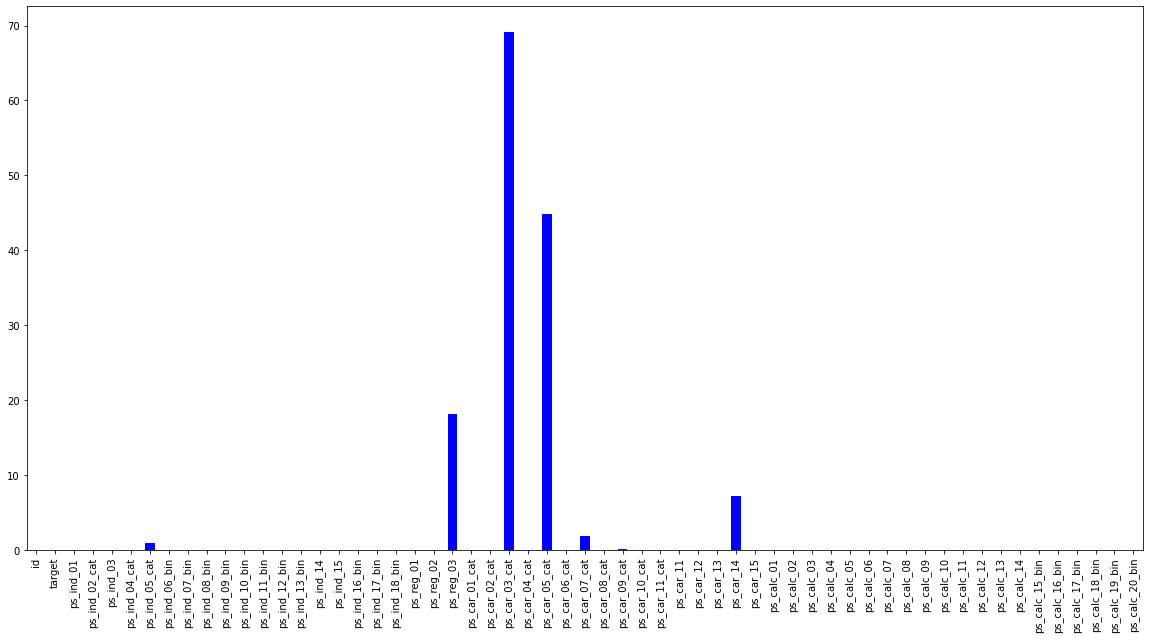

In [24]:
### Check missing values in the train data
fig, ax = plt.subplots(figsize=(20,10))         
(df_train_na.isna().sum()*100/len(df_train_na)).round(2).plot(kind='bar', color='blue');

Missing Values.

In [25]:
#Display the variables with missing values.
vars_with_missing = []

for f in df_train_tr.columns:
    missings = df_train_tr[df_train_tr[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/df_train_tr.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


Replace all missing data designated as -1 per Kaggle description.

In [26]:
categorical_column =[]
categorical_missing_data=[]
not_categorical = []  

def preprocess_data(data_df):
  data_df_copy = data_df.copy()

  if 'target' in data_df.columns:
    train_target = data_df.target
    data_df.drop(['target'], axis=1, inplace=True)
  if 'id' in data_df.columns:
    train_id = data_df.id
    data_df.drop(['id'], axis=1, inplace=True) 

  for label, content in data_df.items():    
    if '_cat'  in label:
      categorical_column.append(label)
      data_df[label].fillna(value=content.mode()[0], inplace=True)
      data_df[label] = data_df[label].astype('category')

    elif '_bin' in label:
      data_df[label].fillna(value=content.mode()[0], inplace=True)

    else:
      data_df[label].fillna(value=content.median(), inplace=True)
      not_categorical.append(label)   

  print(categorical_column)
  if 'target' in data_df_copy.columns:
    data_df.insert(loc=0, column='target', value=train_target)
      
  if ('id' in data_df_copy.columns):
    data_df.insert(loc=0, column='id', value= train_id)

  ### Remove outliers
  # #Dropping the outlier rows with standard deviation
  # factor = 4
  # for label, content in data_df.items():
  #   upper_lim = data_df[label].mean () + data_df[label].std () * factor
  #   lower_lim = data_df[label].mean () - data_df[label].std () * factor

  #   data = data_df[(data_df[label] < upper_lim) & (data_df[label] > lower_lim)]     

  return data_df 

In [27]:
preprocessed_train_data = preprocess_data(df_train_tr)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [28]:
len(categorical_column), len(categorical_missing_data), len(not_categorical)

(14, 0, 12)

In [29]:
preprocessed_train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000


### Encoding and Scaling

---
We will enconde the categorical features and scale the features.



Encoding the categorical features.

In [30]:
#Function for encoding features
def encoding(data_df,categorical_features):
  data_df_copy = data_df.copy()
  if 'target' in data_df.columns:
    train_target = data_df.target
    data_df.drop(['target'], axis=1, inplace=True)
  if 'id' in data_df.columns:
    train_id = data_df.id
    data_df.drop(['id'], axis=1, inplace=True) 
  #One-Hot Encoding of categorical data
  data_df_encoded = pd.get_dummies(data_df[categorical_column])
  data_df_encoded.head()
  data_df_encoded.isna().sum()
  ### After the one-hot encoding, we drop the original unencoded categorical columns,
  ### then one of the new encoded feature columns to reduce multicollinearity.
  data_cat_dropped = data_df.drop(categorical_column, axis=1)
  data_df_encoded.drop(['ps_ind_02_cat_3'], axis=1, inplace=True)
  data_cat_dropped.head()
  ### Concatenate the encoded categorical features with the other features less the unencoded categorical features
  data_upd = pd.concat([data_cat_dropped, data_df_encoded], axis=1)
  if 'target' in data_df_copy.columns:
    data_upd.insert(loc=0, column='target', value=train_target)     
  if ('id' in data_df_copy.columns):
    data_upd.insert(loc=0, column='id', value= train_id)
  data_upd.head()

  return data_upd


In [31]:
train_df = encoding(preprocessed_train_data, categorical_column)

In [32]:
train_df.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_02_cat_-1,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_4,ps_ind_04_cat_-1,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_-1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,...,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,2,0.400000,0.883679,0.370810,3.605551,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,3,0.316228,0.618817,0.388716,2.449490,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13,0,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,1,0.316228,0.641586,0.347275,3.316625,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,0,0,2,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,1,0.374166,0.542949,0.294958,2.000000,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,3,0.316070,0.565832,0.365103,2.000000,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####Feature Selecting

In [33]:
# Extract Features and target
y = train_df['target']
X = train_df.drop(['target', 'id'], axis=1)

In [34]:
fs = FeatureSelector(X, y)

In [35]:
fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98,'task': 'classification',
                                    'eval_metric': 'auc','cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

4 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[121]	valid_0's binary_logloss: 0.152087	valid_0's auc: 0.635574
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[126]	valid_0's binary_logloss: 0.151706	valid_0's auc: 0.643087
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[104]	valid_0's binary_logloss: 0.152521	valid_0's auc: 0.632575
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[119]	valid_0's binary_logloss: 0.151367	valid_0's auc: 0.649355
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.152292	valid_0's auc: 0.632764


In [36]:
train_df_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 49 features.


In [37]:
train_df_removed_all_once.shape

(595212, 157)

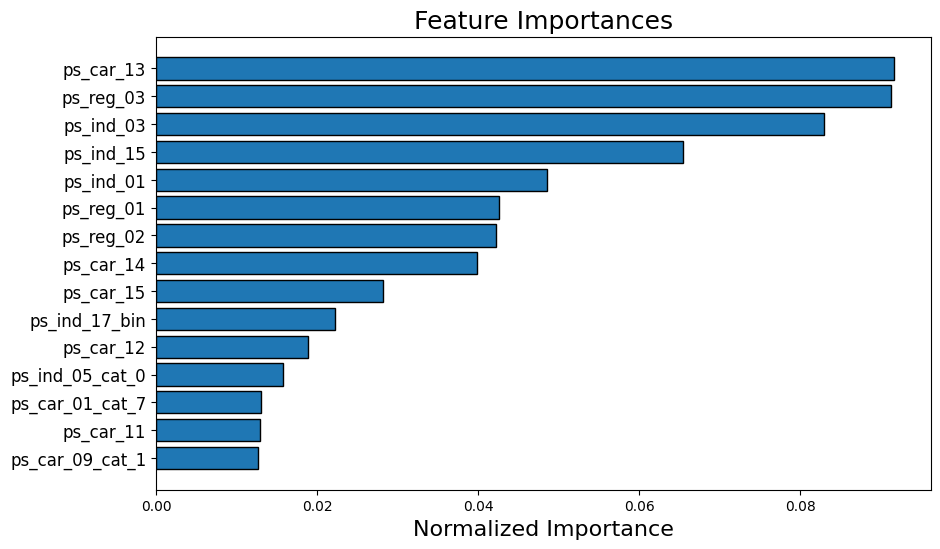

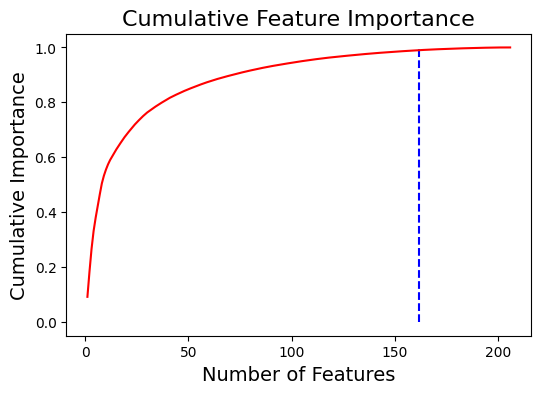

162 features required for 0.99 of cumulative importance


In [38]:
fs.plot_feature_importances(plot_n = 15, threshold=0.99)

In [39]:
preferred_features = np.array(fs.feature_importances[fs.feature_importances['cumulative_importance']<0.990402]['feature'])

In [40]:
preferred_data = fs.data[preferred_features]
preferred_data.head()

,ps_car_13,ps_reg_03,ps_ind_03,ps_ind_15,ps_ind_01,ps_reg_01,ps_reg_02,ps_car_14,ps_car_15,ps_ind_17_bin,ps_car_12,ps_ind_05_cat_0,ps_car_01_cat_7,ps_car_11,ps_car_09_cat_1,ps_ind_07_bin,ps_ind_02_cat_1,ps_ind_06_bin,ps_ind_16_bin,ps_ind_02_cat_2,ps_ind_05_cat_6,ps_car_07_cat_1,ps_ind_05_cat_2,ps_ind_09_bin,ps_car_09_cat_0,ps_ind_04_cat_0,ps_car_04_cat_2,ps_car_03_cat_-1,ps_car_01_cat_9,ps_car_07_cat_0,ps_car_03_cat_1,ps_ind_04_cat_1,ps_car_01_cat_8,ps_ind_08_bin,ps_car_05_cat_1,ps_car_01_cat_6,ps_car_06_cat_9,ps_car_01_cat_4,ps_car_01_cat_11,ps_car_11_cat_65,...,ps_car_11_cat_42,ps_car_11_cat_86,ps_car_08_cat_1,ps_car_11_cat_61,ps_car_11_cat_23,ps_car_11_cat_45,ps_car_11_cat_28,ps_car_11_cat_84,ps_car_11_cat_101,ps_car_11_cat_81,ps_car_04_cat_8,ps_car_11_cat_32,ps_car_11_cat_66,ps_car_01_cat_1,ps_car_11_cat_2,ps_car_06_cat_8,ps_car_11_cat_71,ps_car_11_cat_24,ps_car_11_cat_12,ps_car_11_cat_5,ps_car_11_cat_18,ps_car_11_cat_27,ps_car_06_cat_2,ps_car_11_cat_92,ps_car_06_cat_13,ps_car_11_cat_78,ps_car_11_cat_82,ps_car_11_cat_48,ps_car_07_cat_-1,ps_car_11_cat_6,ps_car_11_cat_11,ps_car_11_cat_98,ps_car_11_cat_89,ps_car_11_cat_69,ps_car_02_cat_1,ps_car_11_cat_88,ps_ind_05_cat_1,ps_car_11_cat_44,ps_car_11_cat_35,ps_car_11_cat_13
0,0.883679,0.718070,5,11,2,0.7,0.2,0.370810,3.605551,1,0.400000,1,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.618817,0.766078,7,3,1,0.8,0.4,0.388716,2.449490,0,0.316228,1,0,3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.641586,-1.000000,9,12,5,0.0,0.0,0.347275,3.316625,0,0.316228,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.542949,0.580948,2,8,0,0.9,0.2,0.294958,2.000000,0,0.374166,1,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.565832,0.840759,0,9,0,0.7,0.6,0.365103,2.000000,0,0.316070,1,0,3,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


####Scale the selected features

In [ ]:
### Lets scale the features to get them with same range of magnitude
X = StandardScaler().fit_transform(preferred_data)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
0,0.210419,0.313526,0.213594,1.043440,0.050218,0.309442,0.264742,-0.591654,0.737869,2.694238,0.343841,0.356758,-0.226641,-0.415678,-0.805893,-0.656444,-1.625951,-1.395821,1.700163,0.275762,-0.189637,1.953633,-0.084138,-0.476919,-0.203952,1.435247,-1.182227,0.668873,-0.232701,-0.188019,1.182566,-0.442786,-0.478017,-0.161298,-0.174644,-0.342198,-0.731765,-1.209256,-0.063946,-0.214469,...,-0.097921,-0.053614,-0.146929,-0.045561,-0.100996,-0.146541,-0.092115,-0.112806,-0.053171,-0.133811,-0.075019,-0.077548,-0.047979,-0.102981,-0.065633,-0.063053,-0.053012,-0.091043,-0.064684,-0.189332,-0.062999,0.452667,-0.062581,-0.14669,-0.105125,-0.086958,-0.079294,-0.111693,-0.054845,-0.074792,9.007970,-0.072345,-0.181755,-0.048764,-0.067177,-0.049944,-0.092319,-0.087505,-0.092937,-0.052274
1,0.270919,-0.865800,0.954362,-1.212598,-0.453868,0.657096,0.314877,-0.096928,-0.842820,-0.371162,-1.092413,0.356758,-0.226641,0.785455,-0.805893,-0.656444,0.615025,-1.395821,-0.588179,0.275762,-0.189637,-0.511867,-0.084138,-0.476919,-0.203952,-0.696744,0.845861,0.668873,-0.232701,-0.188019,-0.845619,2.258425,-0.478017,-0.161298,-0.174644,-0.342198,1.366559,0.826955,-0.063946,-0.214469,...,-0.097921,-0.053614,-0.146929,-0.045561,-0.100996,-0.146541,-0.092115,-0.112806,-0.053171,-0.133811,-0.075019,-0.077548,-0.047979,-0.102981,-0.065633,-0.063053,-0.053012,-0.091043,-0.064684,-0.189332,-0.062999,0.452667,-0.062581,-0.14669,-0.105125,-0.086958,-0.079294,-0.111693,-0.054845,-0.074792,-0.111013,-0.072345,-0.181755,-0.048764,-0.067177,-0.049944,-0.092319,-0.087505,10.759969,-0.052274
2,-1.954747,-0.764418,1.695130,1.325445,1.562477,-2.124135,0.198847,-1.086380,0.342818,-0.371162,-1.092413,0.356758,-0.226641,-1.616811,-0.805893,1.523360,-1.625951,0.716424,-0.588179,0.275762,-0.189637,-0.511867,-0.084138,-0.476919,-0.203952,-0.696744,-1.182227,0.668873,-0.232701,-0.188019,1.182566,2.258425,-0.478017,-0.161298,-0.174644,-0.342198,-0.731765,0.826955,-0.063946,-0.214469,...,-0.097921,-0.053614,-0.146929,-0.045561,-0.100996,-0.146541,-0.092115,-0.112806,-0.053171,-0.133811,-0.075019,-0.077548,-0.047979,-0.102981,-0.065633,-0.063053,-0.053012,-0.091043,-0.064684,-0.189332,-0.062999,0.452667,-0.062581,-0.14669,-0.105125,-0.086958,-0.079294,-0.111693,-0.054845,-0.074792,-0.111013,-0.072345,-0.181755,-0.048764,-0.067177,-0.049944,-0.092319,-0.087505,-0.092937,-0.052274
3,0.037612,-1.203608,-0.897559,0.197425,-0.957955,1.004750,0.052362,-0.591654,-1.457410,-0.371162,-0.099081,0.356758,-0.226641,-1.616811,1.240860,1.523360,0.615025,0.716424,-0.588179,0.275762,-0.189637,-0.511867,-0.084138,-0.476919,-0.203952,-0.696744,0.845861,-1.495052,-0.232701,-0.188019,-0.845619,-0.442786,-0.478017,-0.161298,-0.174644,-0.342198,-0.731765,-1.209256,-0.063946,-0.214469,...,-0.097921,-0.053614,-0.146929,-0.045561,-0.100996,-0.146541,-0.092115,-0.112806,-0.053171,-0.133811,-0.075019,-0.077548,-0.047979,-0.102981,-0.065633,-0.063053,-0.053012,-0.091043,-0.064684,-0.189332,-0.062999,0.452667,-0.062581,-0.14669,-0.105125,-0.086958,-0.079294,-0.111693,-0.054845,-0.074792,-0.111013,-0.072345,-0.181755,-0.048764,-0.067177,-0.049944,-0.092319,-0.087505,-0.092937,-0.052274
4,0.365035,-1.101721,-1.638327,0.479430,-0.957955,0.309442,0.248762,0.397799,-1.457410,-0.371162,-1.095124,0.356758,-0.226641,0.785455,1.240860,-0.656444,-1.625951,0.716424,-0.588179,0.275762,-0.189637,1.953633,-0.084138,-0.476919,-0.203952,-0.696744,-1.182227,0.668873,-0.232701,-0.188019,1.182566,-0.442786,-0.478017,-0.161298,-0.174644,-0.342198,1.366559,0.826955,-0.063946,-0.214469,...,-0.097921,-0.053614,-0.146929,-0.045561,-0.100996,-0.146541,-0.092115,-0.112806,-0.053171,7.473238,-0.075019,-0.077548,-0.047979,-0.102981,-0.065633,-0.063053,-0.053012,-0.0

### Balance Dataset

---

I've used SMOTE: https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html This is used for imbalanced datasets.

In [ ]:
sm = SMOTE(sampling_strategy='not majority',random_state=45)

In [ ]:
Xtrain, ytrain = sm.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 573518, 1: 573518})


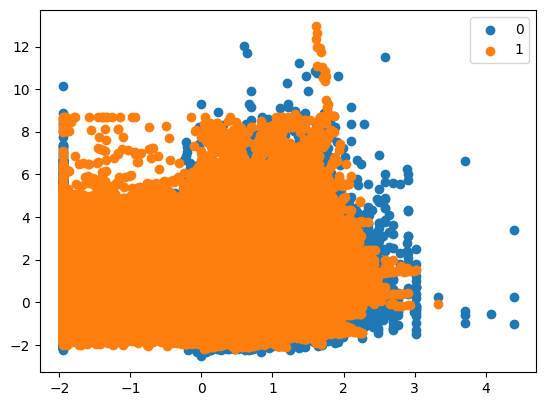

In [ ]:
# summarize the new class distribution - scatter plot
counter = Counter(ytrain)
print(counter)
for label, _ in counter.items():
	row_ix = where(ytrain == label)[0]
	plt.scatter(Xtrain[row_ix, 0], Xtrain[row_ix, 1], label=str(label))
plt.legend()
plt.show()

##Model 90-10% - no balanced dataset

---

It just has the preprocesing without balancing.

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [42]:
#randomForestClassifier Descriptiom
rfc = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [43]:
rfc_model = rfc.fit(X_train, y_train) #train the model
rfc_model.score(X_val, y_val) #accuracy

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.8s finished


0.962719666677867

### Validation

In [44]:
y_pred_prob = rfc_model.predict_proba(X_val)#predict
y_pred_prob

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.3s finished


array([[0.98, 0.02],
       [0.92, 0.08],
       [0.96, 0.04],
       ...,
       [0.91, 0.09],
       [0.97, 0.03],
       [1.  , 0.  ]])

###Evaluation Metrics

In [45]:
y_pred_forest = np.array(rfc_model.predict(X_val)) # Get the prection for validation set
#Get the metrics for validation set
recall = rs(y_val,y_pred_forest)
precision = ps(y_val,y_pred_forest)
f1 = f1s(y_val,y_pred_forest)
ma = rfc_model.score(X_val,y_val)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished


In [46]:
print('### Evaluation metrics for validation dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df= pd.DataFrame({'target':y_val})
pred_df['pred'] = y_pred_forest
print(pred_df.head()) #comparison

### Evaluation metrics for validation dataset ###

Recall Score:  0.0
Precision Score:  0.0
F1 Score:  0.0
Accuracy:  0.962719666677867
        target  pred
256886       0     0
118785       0     0
56083        0     0
542002       0     0
349518       0     0


In [47]:
pred_df.head() #comparison between target and the value predicted.

,target,pred
256886,0,0
118785,0,0
56083,0,0
542002,0,0
349518,0,0


In [48]:
y_pred_forest_prob = rfc_model.predict_proba(X_val)
y_pred_forest_prob #left corresponds to proba to belong class 0 and  right corresponds to proba to belong class 1

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.6s finished


array([[0.98, 0.02],
       [0.92, 0.08],
       [0.96, 0.04],
       ...,
       [0.91, 0.09],
       [0.97, 0.03],
       [1.  , 0.  ]])

###**Confusion Matrix**

In [49]:
#Confusion Matrix
confusionMatrix = cm(y_val, y_pred_forest)
print(confusionMatrix)

[[57303     0]
 [ 2219     0]]


###Normalized Gini Coefficient

In [52]:
ginicoeff =  getNormGiniCoef(y_val, y_pred_forest_prob)
print("Gini Coefficient:",ginicoeff)

Gini Coefficient: 0.48055565046611204


##Model - 80-20% balanced Dataset

---



Dataset will be splited 80-20%.


80% to train, and 20% to validate.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

### Train

In [ ]:
#randomForestClassifier Descriptiom
rfc = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
rfc_model = rfc.fit(X_train, y_train) #train the model
rfc_model.score(X_val, y_val) #accuracy

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.2s finished


0.9814173873622541

### Validation

In [ ]:
y_pred_prob = rfc_model.predict_proba(X_val)#predict
y_pred_prob

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    7.5s finished


array([[0.01, 0.99],
       [0.95, 0.05],
       [0.85, 0.15],
       ...,
       [0.03, 0.97],
       [0.01, 0.99],
       [1.  , 0.  ]])

###Evaluation Metrics

In [ ]:
y_pred_forest = np.array(rfc_model.predict(X_val)) # Get the prection for validation set
#Get the metrics for validation set
recall = rs(y_val,y_pred_forest)
precision = ps(y_val,y_pred_forest)
f1 = f1s(y_val,y_pred_forest)
ma = rfc_model.score(X_val,y_val)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    7.5s finished


In [ ]:
print('### Evaluation metrics for validation dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df= pd.DataFrame({'target':y_val})
pred_df['pred'] = y_pred_forest
print(pred_df.head()) #comparison

### Evaluation metrics for validation dataset ###

Recall Score:  0.9630719781995406
Precision Score:  0.9996645573063045
F1 Score:  0.9810271580773594
Accuracy:  0.9814086692704701
   target  pred
0       1     1
1       0     0
2       0     0
3       1     1
4       1     1


In [ ]:
pred_df.head() #comparison between target and the value predicted.

,target,pred
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1


In [ ]:
pred_df.tail()

,target,pred
229403,0,0
229404,1,1
229405,1,1
229406,1,1
229407,0,0


In [ ]:
pred_df[pred_df['target']==1].head()

,target,pred
0,1,1
3,1,1
4,1,1
5,1,1
8,1,1


In [ ]:
y_pred_forest_prob = rfc_model.predict_proba(X_val)
y_pred_forest_prob #left corresponds to proba to belong class 0 and  right corresponds to proba to belong class 1

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.1s finished


array([[0.01, 0.99],
       [0.95, 0.05],
       [0.85, 0.15],
       ...,
       [0.03, 0.97],
       [0.01, 0.99],
       [1.  , 0.  ]])

###**Confusion Matrix**

In [ ]:
#Confusion Matrix
confusionMatrix = cm(y_val, y_pred_forest)
print(confusionMatrix)

[[114878     37]
 [  4228 110265]]


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred_forest)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.981375000543011


Text(0.5, 0, 'False Positive Rate')

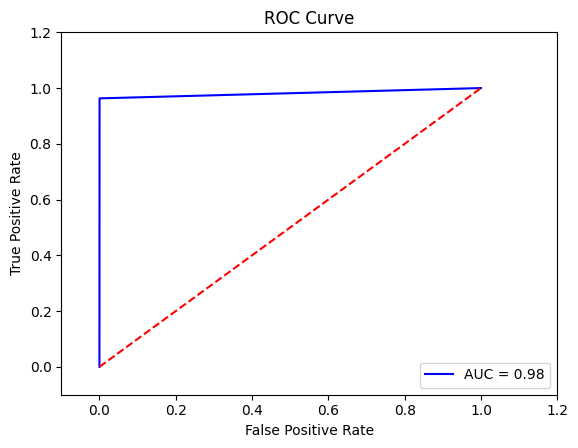

In [ ]:
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###**Accuracy**

In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9814086692704701

### Classification report

In [ ]:
target_names = ["0","1"]
print(classification_report(y_val, y_pred_forest, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114915
           1       1.00      0.96      0.98    114493

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



###Normalized Gini Coefficient

In [51]:
# Funtion to get the normalized gini coefficient.
def ginicoef(ytrue, ypred):
    ytrue = np.asarray(ypred) #In case, someone passes Series or list
    ntrue = len(ytrue)
    a_s = ytrue[np.argsort(ypred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_s.sum() - (ntrue + 1) / 2.0
    return giniSum / ntrue
 
def getNormGiniCoef(expected, predicted):
    if predicted.ndim == 2:
        predicted= predicted[:,1] #If proba array contains proba for both 0 and 1 classes, just pick class 1
    return ginicoef(expected, predicted) / ginicoef(expected, expected)

In [ ]:
ginicoeff =  getNormGiniCoef(y_val, y_pred_forest_prob)
print("Gini Coefficient:",ginicoeff)

Gini Coefficient: 0.9912431532133898


## Model - High relevance features


---

From the model above, we will take the most relvant features to try to improve accuracy.

In [ ]:
X_train = pd.DataFrame(X_train,columns= preferred_data.columns)
X_val = pd.DataFrame(X_val,columns= preferred_data.columns)

In [ ]:
feature_labels = X_train.columns
importances = rfc.feature_importances_

indices = np.argsort(rfc.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feature_labels[indices[f]], importances[indices[f]]))


 1) ps_ind_01                      0.076150
 2) ps_reg_01                      0.060896
 3) ps_reg_02                      0.054400
 4) ps_reg_03                      0.048458
 5) ps_ind_15                      0.044587
 6) ps_ind_03                      0.044170
 7) ps_ind_16_bin                  0.043685
 8) ps_car_15                      0.037251
 9) ps_ind_04_cat_1                0.032080
10) ps_ind_04_cat_0                0.030517
11) ps_ind_06_bin                  0.029810
12) ps_ind_07_bin                  0.029762
13) ps_car_01_cat_11               0.027520
14) ps_car_01_cat_7                0.025010
15) ps_car_13                      0.024507
16) ps_car_05_cat_1                0.023993
17) ps_ind_02_cat_1                0.022147
18) ps_car_05_cat_0                0.020516
19) ps_car_14                      0.020203
20) ps_car_08_cat_0                0.018472
21) ps_car_12                      0.018294
22) ps_ind_09_bin                  0.017666
23) ps_ind_18_bin               

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfc, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feature_labels[sfm.get_support()])

Number of features before selection: 160
Number of features after selection: 80


In [ ]:
df_train_x = X_train[selected_vars]

###Train

In [ ]:
rfc_model_new = rfc.fit(df_train_x, y_train)
rfc_model_new.score(X_val[selected_vars], y_val) #accuracy

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.7s finished


0.9812299483888967

### Validation

In [ ]:
y_pred_probn = rfc_model_new.predict_proba(X_val[selected_vars])#predict
y_pred_probn #left corresponds to proba to belong class 0 and  right corresponds to proba to belong class 1

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.4s finished


array([[0.01, 0.99],
       [0.94, 0.06],
       [0.88, 0.12],
       ...,
       [0.01, 0.99],
       [0.02, 0.98],
       [0.97, 0.03]])

###Evaluation Metrics

In [ ]:
y_pred_forestn = np.array(rfc_model_new.predict(X_val[selected_vars])) # Get the prection for validation set
#Get the metrics for validation set
recall = rs(y_val,y_pred_forestn)
precision = ps(y_val,y_pred_forestn)
f1 = f1s(y_val,y_pred_forestn)
ma = rfc_model_new.score(X_val[selected_vars],y_val)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.9s finished


In [ ]:
print('### Evaluation metrics for validation dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_dfn = pd.DataFrame({'target':y_val})
pred_dfn['pred'] = y_pred_forestn
print(pred_dfn.head()) #comparison

### Evaluation metrics for validation dataset ###

Recall Score:  0.9625304603774903
Precision Score:  0.9997641274074881
F1 Score:  0.980794047756784
Accuracy:  0.9811863579299763
   target  pred
0       1     1
1       0     0
2       0     0
3       1     1
4       1     1


In [ ]:
pred_dfn.head() #comparison between target and the value predicted.

,target,pred
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1


In [ ]:
pred_dfn.tail()

,target,pred
229403,0,0
229404,1,1
229405,1,1
229406,1,1
229407,0,0


In [ ]:
pred_dfn[pred_dfn['target']==1].head()

,target,pred
0,1,1
3,1,1
4,1,1
5,1,1
8,1,1


###**Confusion Matrix**

In [ ]:
#Confusion Matrix
confusionMatrix = cm(y_val, y_pred_forestn)
print(confusionMatrix)

[[114889     26]
 [  4290 110203]]


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred_forestn)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9811521030948062


Text(0.5, 0, 'False Positive Rate')

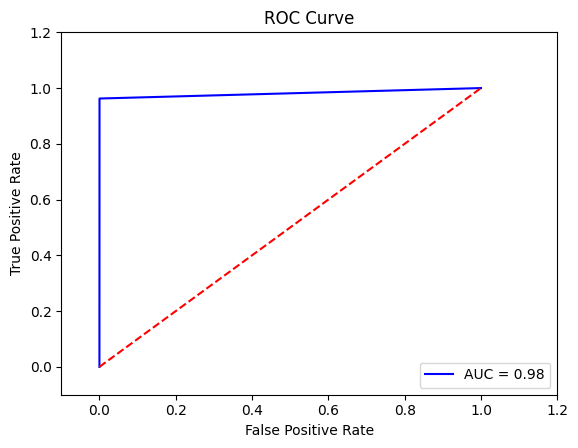

In [ ]:
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###**Accuracy**

In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9811863579299763

The accuracy was improved a little bit then, We will use this model for the test dataset.

### Classification report

In [ ]:
target_names = ["0","1"]
print(classification_report(y_val, y_pred_forestn, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114915
           1       1.00      0.96      0.98    114493

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



###Normalized Gini Coefficient

In [ ]:
ginicoeff =  getNormGiniCoef(y_val, y_pred_probn)
print("Gini Coefficient:",ginicoeff)

Gini Coefficient: 0.9888145102378584


Gini Coefficient decreased a little bit in this model.

# Test Dataset

##Description of Test Dataset

In [ ]:
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,892816.0,744153.461357,429682.969773,0.000000,372021.750000,744307.000000,1.116308e+06,1.488026e+06
ps_ind_01,892816.0,1.902371,1.986503,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,892816.0,1.358613,0.663002,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,892816.0,4.413734,2.700149,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,892816.0,0.417361,0.493453,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,892816.0,0.408132,1.355068,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,892816.0,0.393246,0.488471,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,892816.0,0.257191,0.437086,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,892816.0,0.163659,0.369966,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_09_bin,892816.0,0.185905,0.389030,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [ ]:
df_test.shape

(892816, 58)

##Pre-processing

### Correlation Matrix


---

We will get the correlation with Method Pearson

In [ ]:
corr_df_test = df_test.drop(columns=['id'], axis=1).corr(method='pearson')
corr_df_test

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
ps_ind_01,1.000000,-0.002020,0.224018,0.066391,0.016687,-0.276595,0.005495,0.188839,0.161537,0.001563,-0.015867,-0.021546,-0.010891,-0.023814,0.120478,0.037633,0.098431,-0.109608,0.102449,0.186104,0.139396,-0.058335,-0.115684,0.041994,0.078835,0.214856,0.071793,-9.142296e-05,0.140214,-0.105846,0.010634,0.008714,0.005720,0.161169,0.099797,0.035516,-0.058217,0.000370,-0.000609,0.000141,-0.001333,0.000182,-3.748277e-04,-0.001287,0.001099,0.000162,-0.000440,0.000243,0.001382,0.001224,-0.000366,0.001161,-0.001052,-0.000127,-0.000817,-0.001690,0.000052
ps_ind_02_cat,-0.002020,1.000000,-0.064851,0.146016,-0.016255,-0.125198,0.016944,0.033277,0.106517,0.001101,0.001073,-0.000665,0.000850,0.000215,-0.005591,0.010911,-0.018874,0.001875,0.058633,0.081914,0.067942,0.001088,0.047195,0.000723,-0.074092,-0.006120,-0.018550,-9.477601e-03,-0.001114,0.006678,0.011804,0.013352,0.017229,-0.108736,-0.080633,-0.013880,-0.007075,0.001244,-0.000796,-0.001827,0.000139,0.000211,1.406382e-03,-0.000235,-0.000873,0.001515,0.000388,-0.001914,-0.000822,-0.000862,-0.001200,-0.000272,-0.001212,0.000489,-0.000258,0.000754,-0.003500
ps_ind_03,0.224018,-0.064851,1.000000,-0.094789,0.056139,-0.045164,-0.059010,0.013140,0.110512,0.007588,-0.002767,0.000597,0.000451,0.000850,0.168257,-0.016468,0.023655,0.002811,0.003517,0.050653,0.003573,-0.027245,-0.043958,0.097711,0.073868,0.143385,0.007350,5.538989e-02,0.004102,-0.012249,-0.009038,-0.024521,-0.058853,0.088012,0.049088,0.001704,-0.049367,-0.000195,0.001019,0.000038,0.000550,-0.001481,-1.216197e-03,-0.000320,0.000717,-0.001301,-0.001928,-0.000565,0.000604,0.000405,0.002275,0.001205,-0.002502,-0.001651,0.001305,0.000335,-0.000538
ps_ind_04_cat,0.066391,0.146016,-0.094789,1.000000,0.009494,-0.299063,0.305851,0.044483,-0.010428,-0.001408,0.000380,-0.003479,-0.001079,-0.003003,0.078782,0.016893,0.009961,-0.025779,0.025449,0.078924,0.066718,0.026920,0.002240,0.021129,-0.045910,0.062479,0.027604,6.854145e-02,-0.008911,-0.042311,0.026067,-0.001730,0.072984,-0.095864,-0.033505,-0.006657,0.040829,0.001695,-0.001738,-0.001569,0.000051,0.001148,1.890071e-03,-0.000662,-0.000816,-0.002191,0.002779,0.001866,0.000645,0.000400,0.001579,0.001080,-0.000995,0.001296,-0.001592,0.000895,0.000103
ps_ind_05_cat,0.016687,-0.016255,0.056139,0.009494,1.000000,0.009247,-0.014467,0.007337,-0.002334,0.001117,0.000493,-0.002071,0.001674,-0.000820,0.011468,0.003214,0.008250,-0.008899,-0.017219,-0.005502,-0.018066,-0.036879,0.010564,-0.010601,-0.007025,-0.006428,-0.006572,5.136103e-02,0.000563,-0.005497,0.002495,-0.002426,-0.000414,-0.015479,-0.015404,-0.000715,-0.008326,-0.000135,-0.000775,-0.000966,-0.000879,0.002610,1.865663e-03,0.000715,-0.000425,0.000258,0.001928,-0.001060,0.001097,0.002121,0.001351,0.000168,0.000063,-0.001062,0.002046,0.001892,0.001810
ps_ind_06_bin,-0.276595,-0.125198,-0.045164,-0.299063,0.009247,1.000000,-0.473712,-0.356126,-0.384710,-0.009138,-0.005917,-0.018126,-0.007894,-0.018969,0.016126,0.029017,-0.037073,-0.013726,-0.022473,-0.184481,-0.097985,-0.075725,0.138233,-0.075254,-0.188519,-0.165068,-0.060408,3.715383e-02,0.039783,0.099926,-0.041091,-0.030297,0.017025,-0.221585,-0.273887,-0.007266,-0.165867,-0.000938,0.001836,-0.000871,-0.000128,-0.001229,5.594740e-05,-0.000054,0.000203,-0.000276,0.001178,-0.000361,-0.000

In [ ]:
upper = corr_df_test.where(np.triu(np.ones(corr_df_test.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any (upper[col].abs() > 0.9)]
print(f'collinear columns count: {len(to_drop)}')

collinear columns count: 0


### Heat Map


---

Using Heat Map, we get a better idea of which variables have more correlationship.


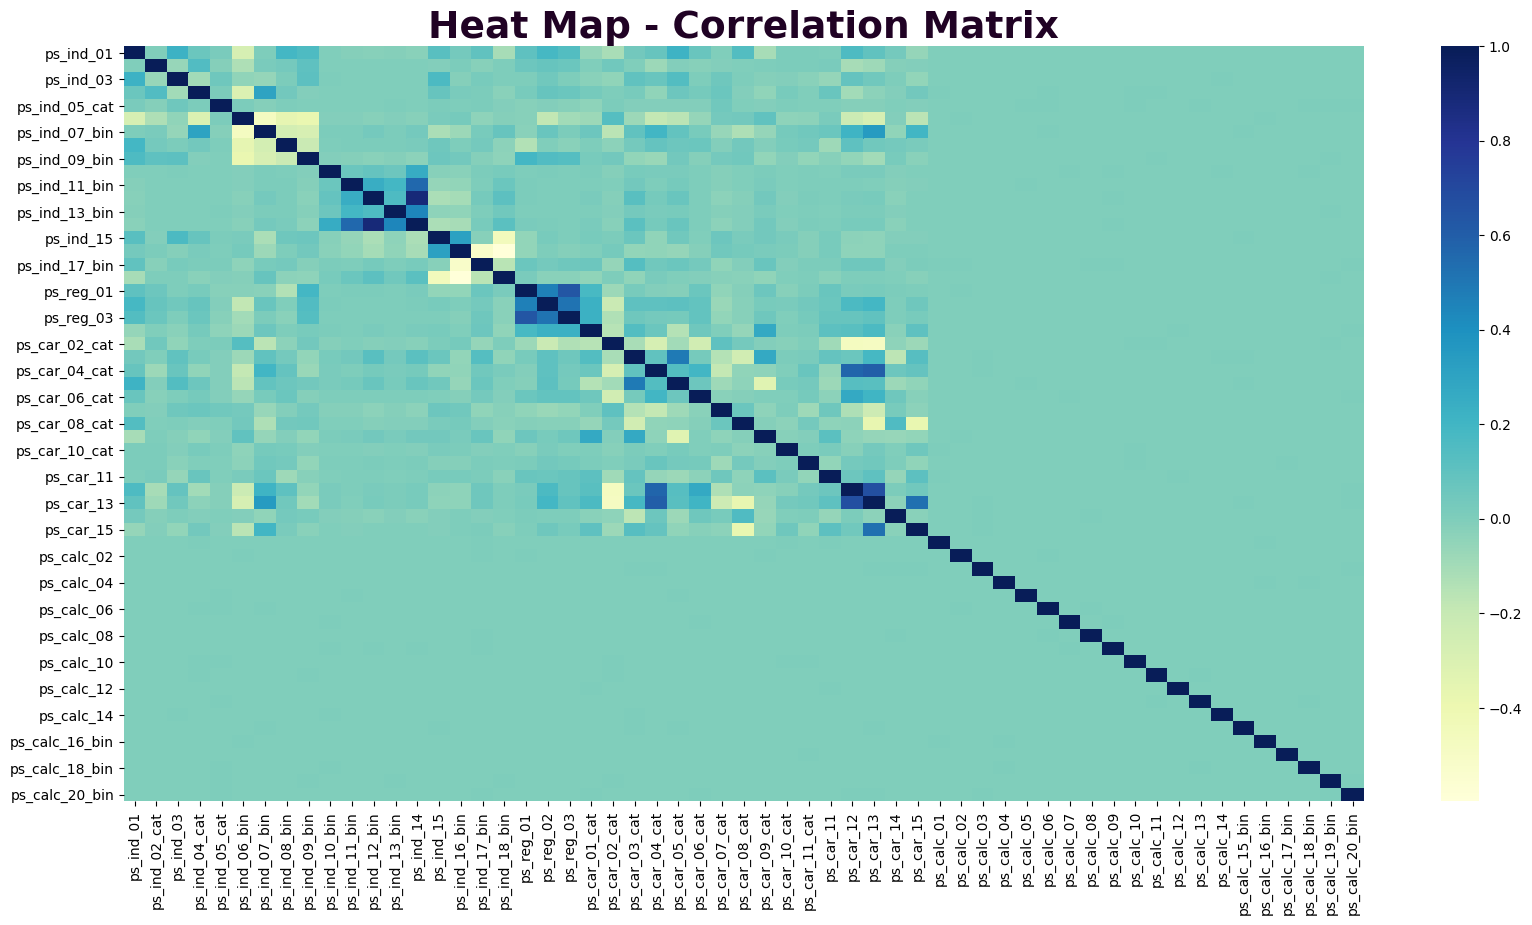

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
sns.heatmap(corr_df_test, annot = False,cmap='YlGnBu',annot_kws={'size':30},ax = ax)
ax.set_title("Heat Map - Correlation Matrix",fontdict={'fontsize': 27,'fontweight' : 'bold', 'color' : '#200224'})
plt.show()

### Cleaning and Fill

In [ ]:
df_test_na.isna().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


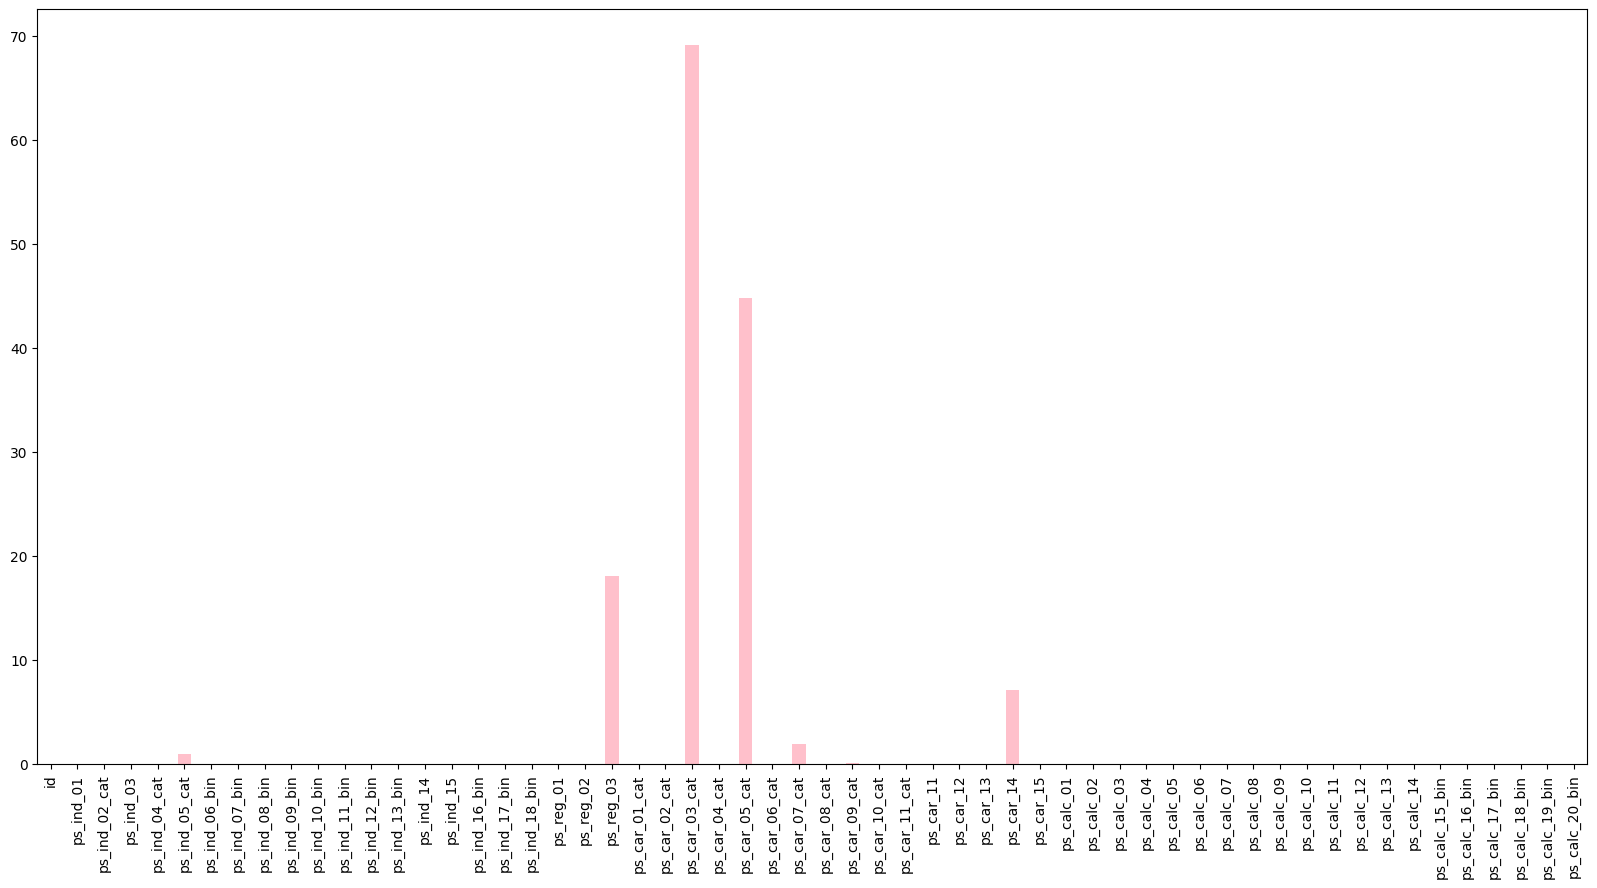

In [ ]:
### Check missing values in the test data
fig, ax = plt.subplots(figsize=(20,10))         
(df_test_na.isna().sum()*100/len(df_test_na)).round(2).plot(kind='bar', color='pink');

Missing Values.

In [ ]:
#Display the variables with missing values.
vars_with_missing = []

for f in df_test.columns:
    missings = df_test[df_test[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/df_test.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 307 records (0.03%) with missing values
Variable ps_ind_04_cat has 145 records (0.02%) with missing values
Variable ps_ind_05_cat has 8710 records (0.98%) with missing values
Variable ps_reg_03 has 161684 records (18.11%) with missing values
Variable ps_car_01_cat has 160 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 616911 records (69.10%) with missing values
Variable ps_car_05_cat has 400359 records (44.84%) with missing values
Variable ps_car_07_cat has 17331 records (1.94%) with missing values
Variable ps_car_09_cat has 877 records (0.10%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 63805 records (7.15%) with missing values
In total, there are 12 variables with missing values


In [ ]:
categorical_column=[]
categorical_missing_data = []
not_categorical = []
preprocessed_test_df = preprocess_data(df_test) ## replace -1 values

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [ ]:
len(categorical_column), len(categorical_missing_data), len(not_categorical)

(14, 0, 26)

In [ ]:
preprocessed_test_df.isna().sum() #verify no "na" values (-1)

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [ ]:
preprocessed_test_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [ ]:
preprocessed_test_df = remove_calc_features(preprocessed_test_df) # we remove again the calc features

In [ ]:
preprocessed_test_df.columns.values

array(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'],
      dtype=object)

In [ ]:
preprocessed_test_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625


### Encoding and Scaling

---
We will enconde the categorical features and scale the features.



In [ ]:
encoded_preprocessed_test_df = encoding(preprocessed_test_df, categorical_column)

In [ ]:
encoded_preprocessed_test_df.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_02_cat_-1,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_4,ps_ind_04_cat_-1,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_-1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_car_01_cat_-1,ps_car_01_cat_0,...,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,8,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,1,0.316228,0.669556,0.352136,3.464102,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,5,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,1,0.316228,0.606320,0.358329,2.828427,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5,3,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,3,0.400000,0.896239,0.398497,3.316625,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,6,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,2,0.374166,0.652110,0.381445,2.449490,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,3,0.374166,0.812914,0.385097,3.316625,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


####Feature Selecting

In [ ]:
#encoded_preprocessed_test_df.drop(['id'], axis=1, inplace=True) #drop id column
preprocessed_test_data = encoded_preprocessed_test_df[preferred_features]# take the same selected features.

In [ ]:
preprocessed_test_data.head()

,ps_car_13,ps_reg_03,ps_ind_03,ps_ind_15,ps_ind_01,ps_reg_01,ps_reg_02,ps_car_14,ps_car_15,ps_ind_17_bin,ps_car_12,ps_ind_05_cat_0,ps_car_01_cat_7,ps_car_11,ps_car_09_cat_1,ps_ind_16_bin,ps_ind_06_bin,ps_ind_07_bin,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_09_bin,ps_car_07_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_6,ps_car_09_cat_0,ps_ind_04_cat_0,ps_car_04_cat_2,ps_car_03_cat_-1,ps_car_03_cat_1,ps_ind_04_cat_1,ps_car_01_cat_9,ps_ind_08_bin,ps_car_07_cat_0,ps_car_01_cat_6,ps_car_05_cat_0,ps_car_01_cat_11,ps_car_01_cat_8,ps_car_09_cat_2,ps_car_01_cat_4,ps_car_05_cat_1,...,ps_car_11_cat_4,ps_car_11_cat_84,ps_car_11_cat_23,ps_car_01_cat_1,ps_car_11_cat_66,ps_car_06_cat_4,ps_car_11_cat_88,ps_car_11_cat_5,ps_car_11_cat_61,ps_car_11_cat_37,ps_car_04_cat_8,ps_car_11_cat_95,ps_car_11_cat_16,ps_car_11_cat_78,ps_car_11_cat_25,ps_car_11_cat_43,ps_car_11_cat_2,ps_car_11_cat_69,ps_car_11_cat_89,ps_car_11_cat_28,ps_ind_05_cat_1,ps_car_11_cat_27,ps_car_11_cat_6,ps_car_11_cat_74,ps_car_11_cat_12,ps_car_06_cat_8,ps_car_11_cat_85,ps_car_11_cat_19,ps_car_11_cat_52,ps_car_08_cat_1,ps_car_11_cat_71,ps_car_11_cat_10,ps_car_11_cat_57,ps_car_11_cat_60,ps_car_06_cat_13,ps_car_04_cat_9,ps_car_11_cat_11,ps_car_11_cat_49,ps_car_11_cat_29,ps_car_11_cat_81
0,0.669556,0.610328,8,12,0,0.5,0.3,0.352136,3.464102,0,0.316228,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.606320,0.771362,5,5,4,0.9,0.5,0.358329,2.828427,0,0.316228,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.896239,0.916174,3,10,5,0.4,0.0,0.398497,3.316625,0,0.400000,1,0,3,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0.652110,-1.000000,6,4,0,0.1,0.2,0.381445,2.449490,0,0.374166,1,1,2,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.812914,0.817771,7,4,5,0.9,0.4,0.385097,3.316625,0,0.374166,1,0,3,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


####Scale the selected features

In [ ]:
X_test = StandardScaler().fit_transform(preprocessed_test_data)

In [ ]:
X_test = pd.DataFrame(X_test,columns= preferred_data.columns)
X_test.head()

,ps_reg_03,ps_car_13,ps_ind_03,ps_ind_15,ps_ind_01,ps_reg_01,ps_car_14,ps_reg_02,ps_car_15,ps_ind_17_bin,ps_car_12,ps_ind_05_cat_0,ps_car_09_cat_1,ps_car_11,ps_ind_06_bin,ps_car_01_cat_7,ps_ind_02_cat_1,ps_ind_16_bin,ps_ind_07_bin,ps_car_07_cat_1,ps_ind_05_cat_6,ps_ind_02_cat_2,ps_ind_05_cat_2,ps_ind_09_bin,ps_car_04_cat_2,ps_car_09_cat_0,ps_ind_04_cat_0,ps_car_03_cat_-1,ps_car_07_cat_0,ps_car_01_cat_9,ps_ind_04_cat_1,ps_ind_08_bin,ps_car_03_cat_1,ps_car_01_cat_8,ps_car_06_cat_9,ps_car_01_cat_6,ps_car_01_cat_11,ps_car_09_cat_2,ps_car_11_cat_21,ps_car_01_cat_4,...,ps_car_11_cat_7,ps_car_11_cat_45,ps_car_11_cat_32,ps_car_11_cat_18,ps_car_11_cat_48,ps_car_11_cat_5,ps_car_11_cat_37,ps_car_11_cat_70,ps_car_11_cat_75,ps_car_11_cat_82,ps_car_11_cat_1,ps_car_11_cat_95,ps_car_01_cat_1,ps_car_06_cat_13,ps_car_11_cat_2,ps_car_11_cat_71,ps_car_11_cat_23,ps_car_11_cat_84,ps_car_11_cat_6,ps_car_04_cat_8,ps_car_11_cat_24,ps_car_02_cat_1,ps_car_11_cat_30,ps_car_11_cat_28,ps_car_11_cat_92,ps_car_11_cat_29,ps_car_11_cat_86,ps_car_11_cat_78,ps_car_11_cat_69,ps_car_11_cat_43,ps_car_11_cat_12,ps_car_11_cat_66,ps_car_04_cat_9,ps_car_06_cat_8,ps_car_11_cat_14,ps_car_11_cat_35,ps_car_11_cat_89,ps_car_11_cat_88,ps_car_11_cat_19,ps_car_11_cat_54
0,0.073786,-0.640988,1.328174,1.327840,-0.957649,-0.386017,0.212157,-0.345627,0.542901,-0.369971,-1.091526,0.357971,-0.227315,-1.619167,-0.805055,1.517300,0.615577,0.716796,1.699460,0.275287,-0.190339,-0.513286,-0.08579,-0.477868,-0.202946,-0.697127,-1.180738,0.668757,-0.231899,-0.187038,1.181132,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,-0.731392,0.827680,-0.064035,-0.215282,...,-0.098598,-0.054147,-0.145852,-0.045357,-0.101971,-0.146204,-0.09275,-0.113969,-0.054716,-0.13375,-0.074264,-0.078109,-0.047525,-0.101533,-0.065603,-0.063415,-0.05196,-0.091314,-0.063548,-0.188429,-0.06277,0.452656,-0.063352,-0.146686,-0.105555,-0.085571,-0.079183,-0.111652,-0.055767,-0.074667,-0.112099,-0.073351,-0.182648,-0.048078,-0.06753,-0.051262,-0.093271,-0.086889,-0.091657,-0.051917
1,0.276595,-0.922315,0.217124,-0.648475,1.055941,1.004326,0.229513,0.148594,-0.329076,-0.369971,-1.091526,0.357971,-0.227315,-1.619167,-0.805055,-0.659065,-1.624493,0.716796,-0.588422,0.275287,-0.190339,1.948230,-0.08579,2.092628,-0.202946,1.434459,-1.180738,0.668757,-0.231899,-0.187038,1.181132,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,-0.731392,-1.208196,-0.064035,4.645067,...,-0.098598,-0.054147,-0.145852,-0.045357,-0.101971,-0.146204,-0.09275,-0.113969,-0.054716,-0.13375,-0.074264,-0.078109,-0.047525,-0.101533,-0.065603,-0.063415,-0.05196,-0.091314,-0.063548,-0.188429,-0.06277,0.452656,-0.063352,-0.146686,-0.105555,-0.085571,-0.079183,-0.111652,-0.055767,-0.074667,-0.112099,-0.073351,-0.182648,-0.048078,-0.06753,-0.051262,-0.093271,-0.086889,-0.091657,-0.051917
2,0.458972,0.367482,-0.523576,0.763179,1.559339,-0.733603,0.342080,-1.086959,0.340602,-0.369971,0.343296,0.357971,-0.227315,0.785645,-0.805055,-0.659065,0.615577,-1.395097,-0.588422,0.275287,-0.190339,-0.513286,-0.08579,2.092628,-0.202946,-0.697127,0.846928,0.668757,-0.231899,-0.187038,-0.846645,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,1.367256,0.827680,-0.064035,-0.215282,...,-0.098598,-0.054147,-0.145852,-0.045357,-0.101971,-0.146204,-0.09275,-0.113969,-0.054716,-0.13375,-0.074264,-0.078109,-0.047525,-0.101533,-0.065603,-0.063415,-0.05196,-0.091314,-0.063548,-0.188429,-0.06277,0.452656,-0.063352,-0.146686,-0.105555,11.686229,-0.079183,-0.111652,-0.055767,-0.074667,-0.112099,-0.073351,-0.182648,-0.048078,-0.06753,-0.051262,-0.093271,-0.086889,-0.091657,-0.051917
3,-1.954277,-0.718602,0.587474,-0.930805,-0.957649,-1.776360,0.294291,-0.592738,-0.848877,-0.369971,-0.099184,0.357971,-0.227315,-0.416761,1.242151,1.517300,0.615577,0.716796,-0.588422,0.275287,-0.190339,-0.513286,-0.08579,-0.477868,-0.202946,-0.697127,0.846928,0.668757,-0.231899,-0.187038,-0.846645,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,-0.731392,0.827680,-0.064035,-0.215282,...,-0.098598,-0.05414

In [ ]:
X_test.shape

(892816, 160)

#### Take the highest relevance features.

In [ ]:
df_test_x = X_test[selected_vars]

In [ ]:
df_test_x.head()

,ps_reg_03,ps_car_13,ps_ind_03,ps_ind_15,ps_ind_01,ps_reg_01,ps_car_14,ps_reg_02,ps_car_15,ps_ind_17_bin,ps_car_12,ps_ind_05_cat_0,ps_car_09_cat_1,ps_car_11,ps_ind_06_bin,ps_car_01_cat_7,ps_ind_02_cat_1,ps_ind_16_bin,ps_ind_07_bin,ps_car_07_cat_1,ps_ind_05_cat_6,ps_ind_02_cat_2,ps_ind_09_bin,ps_car_04_cat_2,ps_car_09_cat_0,ps_ind_04_cat_0,ps_car_03_cat_-1,ps_car_07_cat_0,ps_car_01_cat_9,ps_ind_04_cat_1,ps_ind_08_bin,ps_car_03_cat_1,ps_car_01_cat_8,ps_car_06_cat_9,ps_car_01_cat_6,ps_car_01_cat_11,ps_car_09_cat_2,ps_car_01_cat_4,ps_car_05_cat_-1,ps_car_05_cat_1,ps_car_02_cat_0,ps_car_11_cat_65,ps_car_06_cat_1,ps_car_05_cat_0,ps_car_08_cat_0,ps_ind_18_bin,ps_car_06_cat_3,ps_car_06_cat_15,ps_car_01_cat_10,ps_ind_05_cat_4,ps_car_06_cat_11,ps_ind_05_cat_3,ps_car_06_cat_0,ps_car_04_cat_0,ps_car_03_cat_0,ps_ind_02_cat_4,ps_car_09_cat_3,ps_car_11_cat_104,ps_car_06_cat_7,ps_car_11_cat_87,ps_car_04_cat_1,ps_car_11_cat_64,ps_car_11_cat_103,ps_car_11_cat_83,ps_car_06_cat_10,ps_car_01_cat_5,ps_car_06_cat_14,ps_car_11_cat_101,ps_car_06_cat_4,ps_car_06_cat_6,ps_car_07_cat_-1,ps_car_11_cat_32,ps_car_11_cat_5,ps_car_11_cat_70,ps_car_11_cat_82,ps_car_04_cat_8,ps_car_02_cat_1,ps_car_11_cat_28,ps_car_11_cat_12,ps_car_04_cat_9
0,0.073786,-0.640988,1.328174,1.327840,-0.957649,-0.386017,0.212157,-0.345627,0.542901,-0.369971,-1.091526,0.357971,-0.227315,-1.619167,-0.805055,1.517300,0.615577,0.716796,1.699460,0.275287,-0.190339,-0.513286,-0.477868,-0.202946,-0.697127,-1.180738,0.668757,-0.231899,-0.187038,1.181132,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,-0.731392,0.827680,-0.215282,1.109071,-0.63906,-0.452647,7.200346,2.009678,-0.595220,-0.448858,-0.428245,-0.143581,-0.194111,-0.301729,-0.177808,-0.534452,-0.119263,-0.476272,0.445879,-0.374415,-0.138824,-0.159101,-0.408922,-0.167922,-0.172386,-0.239531,-0.196257,-0.207340,-0.126198,-0.243817,-0.176389,-0.331629,-0.112083,-0.234957,-0.191615,-0.140698,-0.145852,-0.146204,-0.113969,-0.13375,-0.188429,0.452656,-0.146686,-0.112099,-0.182648
1,0.276595,-0.922315,0.217124,-0.648475,1.055941,1.004326,0.229513,0.148594,-0.329076,-0.369971,-1.091526,0.357971,-0.227315,-1.619167,-0.805055,-0.659065,-1.624493,0.716796,-0.588422,0.275287,-0.190339,1.948230,2.092628,-0.202946,1.434459,-1.180738,0.668757,-0.231899,-0.187038,1.181132,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,-0.731392,-1.208196,4.645067,-0.901656,-0.63906,-0.452647,-0.138882,-0.497592,1.680052,-0.448858,-0.428245,-0.143581,-0.194111,-0.301729,-0.177808,1.871075,-0.119263,-0.476272,0.445879,-0.374415,-0.138824,-0.159101,-0.408922,-0.167922,-0.172386,-0.239531,-0.196257,4.822997,-0.126198,-0.243817,-0.176389,-0.331629,-0.112083,-0.234957,-0.191615,-0.140698,-0.145852,-0.146204,-0.113969,-0.13375,-0.188429,0.452656,-0.146686,-0.112099,-0.182648
2,0.458972,0.367482,-0.523576,0.763179,1.559339,-0.733603,0.342080,-1.086959,0.340602,-0.369971,0.343296,0.357971,-0.227315,0.785645,-0.805055,-0.659065,0.615577,-1.395097,-0.588422,0.275287,-0.190339,-0.513286,2.092628,-0.202946,-0.697127,0.846928,0.668757,-0.231899,-0.187038,-0.846645,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,1.367256,0.827680,-0.215282,1.109071,-0.63906,-0.452647,-0.138882,-0.497592,-0.595220,-0.448858,-0.428245,-0.143581,-0.194111,-0.301729,-0.177808,-0.534452,-0.119263,-0.476272,0.445879,-0.374415,-0.138824,-0.159101,-0.408922,-0.167922,-0.172386,-0.239531,-0.196257,-0.207340,-0.126198,-0.243817,-0.176389,3.015421,-0.112083,-0.234957,-0.191615,-0.140698,-0.145852,-0.146204,-0.113969,-0.13375,-0.188429,0.452656,-0.146686,-0.112099,-0.182648
3,-1.954277,-0.718602,0.587474,-0.930805,-0.957649,-1.776360,0.294291,-0.592738,-0.848877,-0.369971,-0.099184,0.357971,-0.227315,-0.416761,1.242151,1.517300,0.615577,0.716796,-0.588422,0.275287,-0.190339,-0.513286,-0.477868,-0.202946,-0.697127,0.846928,0.668757,-0.231899,-0.187038,-0.846645,-0.442362,-0.47814,-0.160824,-0.173851,-0.341783,-0.731392,0.827680,-0.215282,1.109071,-0.63906,-0.452647,-0.138882,2.009678,-0.595220,-0.448858,

## Test Prediction

In [ ]:
#To get the probability
y_proba_test=rfc_model.predict_proba(X_test)

In [ ]:
y_proba_test[:,1][:20]

array([0.98, 0.97, 0.76, 0.94, 0.92, 0.9 , 0.9 , 0.95, 0.7 , 0.92, 0.58,
       0.41, 0.99, 1.  , 0.91, 0.9 , 0.95, 0.92, 0.69, 0.93])

In [ ]:
y_pred_forest_test = np.array(rfc_model.predict(X_test)) # Get the prection

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   10.1s finished


In [ ]:
test_pred_df = pd.DataFrame(y_proba_test[:,1], columns=['target_proba'], index=np.arange(0,len(preprocessed_test_df)))
test_pred_df['target_pred'] = y_pred_forest_test

In [ ]:
test_pred_df.head()

,target_proba,target_pred
0,1.00,1
1,0.97,1
2,0.73,1
3,0.98,1
4,0.95,1


In [ ]:
test_pred_df.tail()

,target_proba,target_pred
892811,1.00,1
892812,0.86,1
892813,0.71,1
892814,0.83,1
892815,0.95,1


In [ ]:
test_pred_df[test_pred_df['target_pred']==1].head()

,target_proba,target_pred
0,1.00,1
1,0.97,1
2,0.73,1
3,0.98,1
4,0.95,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


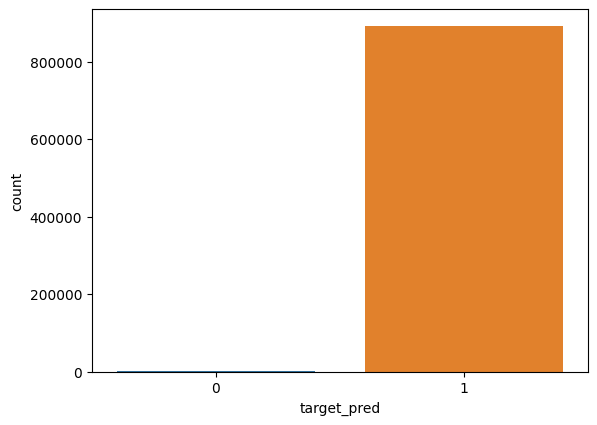

In [ ]:
sns.countplot(test_pred_df['target_pred'])

In [ ]:
test_pred_df['target_pred'].value_counts()

1    890899
0      1917
Name: target_pred, dtype: int64

In [ ]:
predictions_df = test_pred_df.copy()
predictions_df

,target_proba,target_pred
0,1.00,1
1,0.97,1
2,0.73,1
3,0.98,1
4,0.95,1
...,...,...
892811,1.00,1
892812,0.86,1
892813,0.71,1
892814,0.83,1


In [ ]:
predictions_df.to_csv('Predictions.csv')

# Conclusion


---




We could see that preprocessing is really importan when we are trying to improve our accuracy and decrease the resources for data processing in a model training. Depends on the data that your using, you will need to generate several models or/and transformations to get the best results for your data.